In [1]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

import pandas as pd
import numpy as np

# TRAIN_START_DATE = '2010-01-01'
# TRAIN_END_DATE = '2021-10-01'
# TEST_START_DATE = '2021-10-01'
# TEST_END_DATE = '2024-03-01'

# TODO extend this test date
# PLOT_DATES_TEST_START = '2022-01-03'
# PLOT_DATES_TEST_END = '2023-12-29'
# ensemble_result_file = "result.csv"

# TODO extend this test date
# PLOT_DATES_TEST_START = '2019-01-03'
# PLOT_DATES_TEST_END = '2020-12-28'
# ensemble_result_file = "result20192022.csv"
# value_to_remove = "DOW"
# # Create a new list without the specified string
# DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]

PLOT_DATES_TEST_START = '2020-03-10'
PLOT_DATES_TEST_END = '2021-01-01'
ensemble_result_file = "result.csv"

value_to_remove = "DOW"
# Create a new list without the specified string
DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]

# TODO Try a longer date range, Some columns have issues over this date range
# Value to be removed
# value_to_remove = "DOW"
# # Create a new list without the specified string
# DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]
# print(DOW_30_TICKER)
# PLOT_DATES_TEST_START = '2015-01-03'
# PLOT_DATES_TEST_END = '2023-12-29'

COMMISSION_FEE_PERCENT = 0.0025



df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
                     end_date = PLOT_DATES_TEST_END,
                     ticker_list = DOW_30_TICKER).fetch_data()


# # They replace close price with adjusted close price
# df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
#                      end_date = PLOT_DATES_TEST_END,
#                      ticker_list = [
#     "AMGN",
#     "AAPL",
#     "AMAT",
#     "INTC",
#     "PCAR",
#     "PAYX",
#     "MSFT"]).fetch_data()

print(df.head())


# Count rows with any null values
null_rows_count = df.isnull().any(axis=1).sum()

print(f"Number of rows containing null values: {null_rows_count}")


print("Check for o-nulls")
print(df.notnull().all().all())

assert df.notnull().all().all()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (6003, 8)
         date        open        high         low       close     volume  \
0  2020-03-10   69.285004   71.610001   67.342499   69.398430  285290000   
1  2020-03-10  203.360001  207.100006  194.669998  180.209366    3928700   
2  2020-03-10  101.930000  103.370003   97.449997   96.770439    9793200   
3  2020-03-10  237.000000  237.830002  215.000000  231.009995   13059600   
4  2020-03-10  108.639999  109.059998   99.110001   96.434265    8293200   

    tic  day  
0  AAPL    1  
1  AMGN    1  
2   AXP    1  
3    BA    1  
4   CAT    1  
Number of rows containing null values: 0
Check for o-nulls
True


In [95]:
def calculate_final_investment(X, B, initial_investment, buy_cost=0, sell_cost=0):
    # Ensure both dataframes have the same index
    assert X.index.equals(B.index), "The indices of X and B must be the same."

    # Calculate log returns
    log_returns = np.log(X)
    
    # Calculate weighted log returns
    weighted_log_returns = (log_returns * B).sum(axis=1)
    
    # Calculate transaction costs
    transaction_costs = (B.diff().abs() * buy_cost).sum(axis=1) + (B.diff().abs() * sell_cost).sum(axis=1)
    transaction_costs.iloc[0] = 0  # TODO Wrong: No transaction cost for the first period
    
    # Adjust the returns by subtracting the transaction costs
    adjusted_weighted_log_returns = weighted_log_returns - transaction_costs
    
    # Calculate cumulative log returns
    cumulative_log_returns = adjusted_weighted_log_returns.cumsum()
    
    # Calculate cumulative return factor
    cumulative_return_factor = np.exp(cumulative_log_returns)
    
    # Calculate the final investment amount
    final_investment = initial_investment * cumulative_return_factor
    
    return final_investment

def calculate_final_investment_bah(X, B, initial_investment, buy_cost=0):
    # No selling for BAH, only transaction cost of first period 

    # Ensure both dataframes have the same index
    assert X.index.equals(B.index), "The indices of X and B must be the same."

    # Calculate log returns
    log_returns = np.log(X)
    
    # Calculate weighted log returns
    weighted_log_returns = (log_returns * B).sum(axis=1)
    print(B)
    print(X)
    
    # Calculate transaction costs
    transaction_costs = (B.iloc[0] * X.iloc[0]).sum(axis=1) * buy_cost

    # Adjust the returns by subtracting the transaction costs
    adjusted_weighted_log_returns = weighted_log_returns - transaction_costs
    
    # Calculate cumulative log returns
    cumulative_log_returns = adjusted_weighted_log_returns.cumsum()
    
    # Calculate cumulative return factor
    cumulative_return_factor = np.exp(cumulative_log_returns)
    
    # Calculate the final investment amount
    final_investment = initial_investment * cumulative_return_factor
    
    return final_investment

In [96]:
# Current and Target Weights
current_weights = pd.Series({'A': 0.5, 'B': 0.3, 'C': 0.2})
target_weights = pd.Series({'A': 0.4, 'B': 0.4, 'C': 0.2})

# Portfolio Value
portfolio_value = 100000

# Current Values
current_values = current_weights * portfolio_value

# Target Values
target_values = target_weights * portfolio_value

# Calculate Buy and Sell Amounts
buy_amounts = target_values[target_values > current_values] - current_values[target_values > current_values]
sell_amounts = current_values[current_values > target_values] - target_values[current_values > target_values]

print("Buy Amounts:\n", buy_amounts)
print("Sell Amounts:\n", sell_amounts)

Buy Amounts:
 B    10000.0
dtype: float64
Sell Amounts:
 A    10000.0
dtype: float64


In [97]:
import pandas as pd


df = pd.DataFrame(df)

print(df.dtypes)

# Pivot the DataFrame
pivot_df = df.pivot(index='date', columns='tic', values='close')

print(pivot_df)

pivot_df.index = pd.to_datetime(pivot_df.index)



# If we pivot and there are nulls, it means some dates dont have all prices
# Count rows with any null values
# Identify columns with null values
columns_with_nulls = df.columns[df.isnull().any()].tolist()

# Identify rows with null values
rows_with_nulls = pivot_df[pivot_df.isnull().any(axis=1)]

print("Columns with null values:", columns_with_nulls)
print("Rows with null values:\n", rows_with_nulls)

print("Check for o-nulls")
print(pivot_df.notnull().all().all())


assert pivot_df.notnull().all().all()


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int32
dtype: object
tic               AAPL        AMGN         AXP          BA         CAT  \
date                                                                     
2020-03-10   69.398430  180.209366   96.770439  231.009995   96.434265   
2020-03-11   66.988190  173.107330   89.351059  189.080002   91.181961   
2020-03-12   60.372799  158.807343   78.250099  154.839996   83.547989   
2020-03-13   67.605957  176.113739   93.304306  170.199997   90.231079   
2020-03-16   58.908657  164.419296   80.442192  129.610001   84.589394   
...                ...         ...         ...         ...         ...   
2020-12-24  129.189499  198.227829  111.508377  217.149994  166.335968   
2020-12-28  133.810059  198.868088  112.468094  216.089996  165.233612   
2020-12-29  132.028397  201.731277  112.259041  216.250000  163.640289   
2020-12-30  130.902649  201.

<Axes: xlabel='date'>

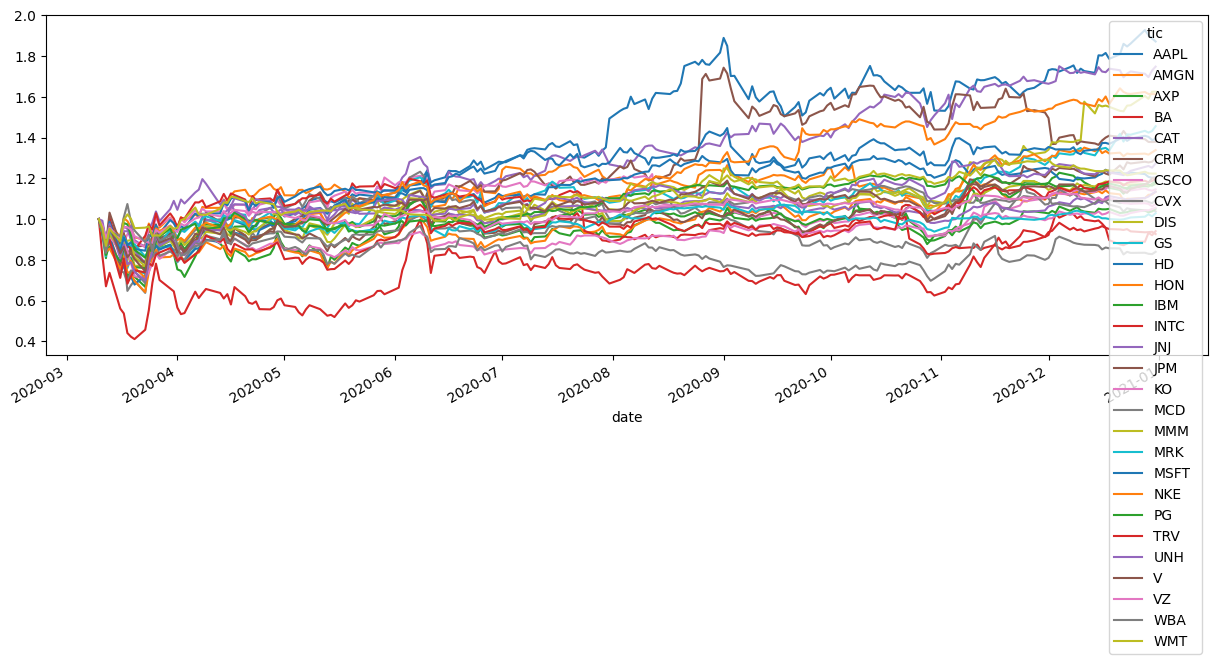

In [98]:
import matplotlib.pyplot as plt
# plot normalized prices of these stocks
(pivot_df / pivot_df.iloc[0,:]).plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:233: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_al

Summary:
    Profit factor: 1.33
    Sharpe ratio: 1.71 ± 1.74
    Ulcer index: 10.59
    Information ratio (wrt benchmark): 1.56
    Benchmark sharpe: 0.98 ± 1.35
    Appraisal ratio (wrt benchmark): 1.42 ± 1.11
    Beta / Alpha: 1.19 / 62.085%
    Annualized return: 104.13%
    Annualized volatility: 61.03%
    Longest drawdown: 53 days
    Max drawdown: 36.07%
    Winning days: 55.3%
    Annual turnover: 326.2
        


[<Axes: xlabel='date', ylabel='Total wealth'>,
 <Axes: xlabel='date', ylabel='weights'>]

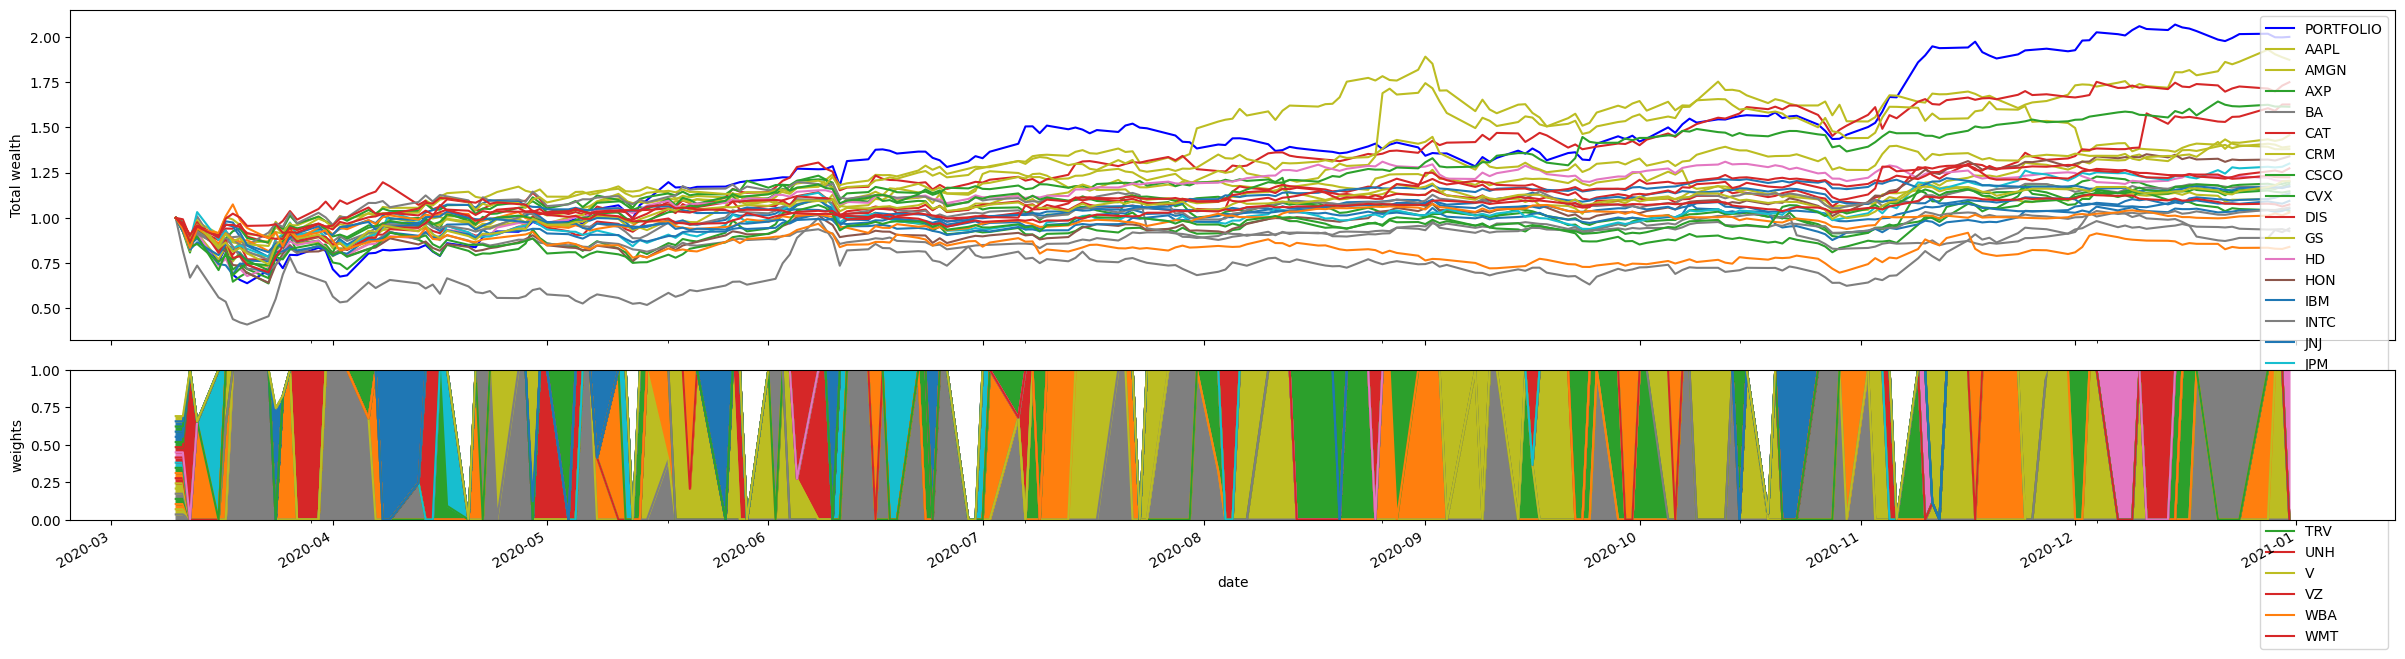

In [99]:
from online_algos import OLMAR, BCRP, CRP, BAH, UP


# Simple Moving Average (SMA) vs. Exponential Moving Average (EMA)
# Simple Moving Average (SMA)
# Calculation: Averages the prices over a specified period.

# Sensitivity: Less sensitive to recent price changes because each period has equal weight.

# Lag: More lag compared to EMA, meaning it reacts slower to price changes.

# Use Case: Suitable for identifying longer-term trends.

# Exponential Moving Average (EMA)
# Calculation: Gives more weight to recent prices, making it more responsive.

# Sensitivity: More sensitive to recent price changes due to the weighting factor.

# Lag: Less lag compared to SMA, meaning it reacts faster to price changes.

# Use Case: Better for short-term trading strategies and identifying rapid changes.


algo = OLMAR(window=5, eps=10, ma_type="SMA")

result_olmar = algo.run(pivot_df)
print(result_olmar.summary())
result_olmar.plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.33
    Sharpe ratio: 1.71 ± 1.74
    Ulcer index: 10.59
    Information ratio (wrt benchmark): 1.56
    Benchmark sharpe: 0.98 ± 1.35
    Appraisal ratio (wrt benchmark): 1.42 ± 1.11
    Beta / Alpha: 1.19 / 62.085%
    Annualized return: 104.13%
    Annualized volatility: 61.03%
    Longest drawdown: 53 days
    Max drawdown: 36.07%
    Winning days: 55.3%
    Annual turnover: 326.2
        
Summary:
    Profit factor: 1.01
    Sharpe ratio: 0.37 ± 1.15
    Ulcer index: 1.51
    Information ratio (wrt benchmark): -0.30
    Benchmark sharpe: 0.98 ± 1.35
    Appraisal ratio (wrt benchmark): -0.44 ± 1.11
    Beta / Alpha: 1.18 / -19.564%
    Annualized return: 22.59%
    Annualized volatility: 61.06%
    Longest drawdown: 122 days
    Max drawdown: 37.75%
    Winning days: 45.6%
    Annual turnover: 326.2
        


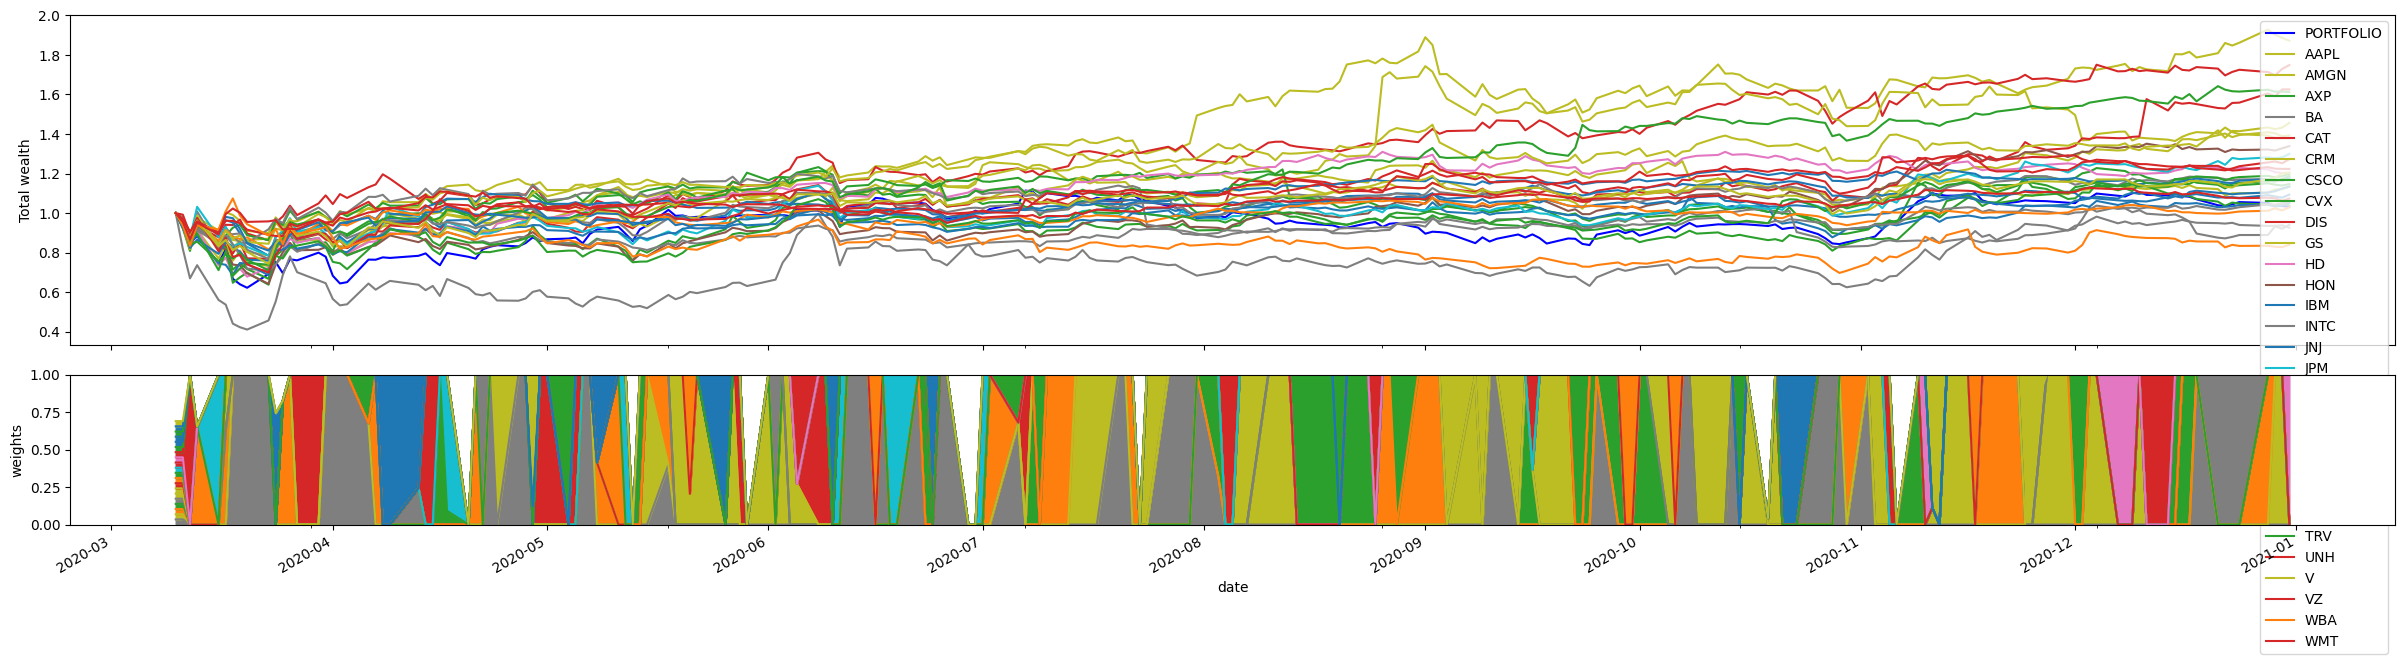

In [100]:
olmar_B = result_olmar.B
olmar_X = result_olmar.X
print(result_olmar.summary())


result_olmar.fee = COMMISSION_FEE_PERCENT
print(result_olmar.summary())
result_olmar.plot()
olmar_B_fee = result_olmar.B
olmar_X_fee = result_olmar.X


# Cimpare results to makret

Summary:
    Profit factor: 0.96
    Sharpe ratio: -0.07 ± 1.01
    Ulcer index: -0.11
    Information ratio (wrt benchmark): 0.13
    Benchmark sharpe: -0.29 ± 1.03
    Appraisal ratio (wrt benchmark): 0.20 ± 1.01
    Beta / Alpha: 1.28 / 5.069%
    Annualized return: -2.37%
    Annualized volatility: 36.16%
    Longest drawdown: 218 days
    Max drawdown: 37.40%
    Winning days: 49.2%
    Annual turnover: 212.5
        
Summary:
    Profit factor: 0.87
    Sharpe ratio: -0.65 ± 1.11
    Ulcer index: -0.88
    Information ratio (wrt benchmark): -0.68
    Benchmark sharpe: -0.29 ± 1.03
    Appraisal ratio (wrt benchmark): -0.63 ± 1.01
    Beta / Alpha: 1.28 / -16.245%
    Annualized return: -23.62%
    Annualized volatility: 36.30%
    Longest drawdown: 218 days
    Max drawdown: 44.97%
    Winning days: 48.0%
    Annual turnover: 212.5


When factoring in the fees, our portiolo is underperfomring the market in sharpe ratio and returns

Net Worth Over Time:
date
2020-03-10    1.000000e+06
2020-03-11    9.461714e+05
2020-03-12    8.529440e+05
2020-03-13    8.920302e+05
2020-03-16    7.585388e+05
                  ...     
2020-12-24    2.008620e+06
2020-12-28    2.010647e+06
2020-12-29    1.991135e+06
2020-12-30    1.990598e+06
2020-12-31    1.993300e+06
Length: 207, dtype: float64
            date        open        high         low       close     volume  \
0     2020-03-10   69.285004   71.610001   67.342499   69.398430  285290000   
1     2020-03-10  203.360001  207.100006  194.669998  180.209366    3928700   
2     2020-03-10  101.930000  103.370003   97.449997   96.770439    9793200   
3     2020-03-10  237.000000  237.830002  215.000000  231.009995   13059600   
4     2020-03-10  108.639999  109.059998   99.110001   96.434265    8293200   
...          ...         ...         ...         ...         ...        ...   
5998  2020-12-31  345.040009  351.089996  344.049988  332.465424    1969000   
5999  2020-12-31 

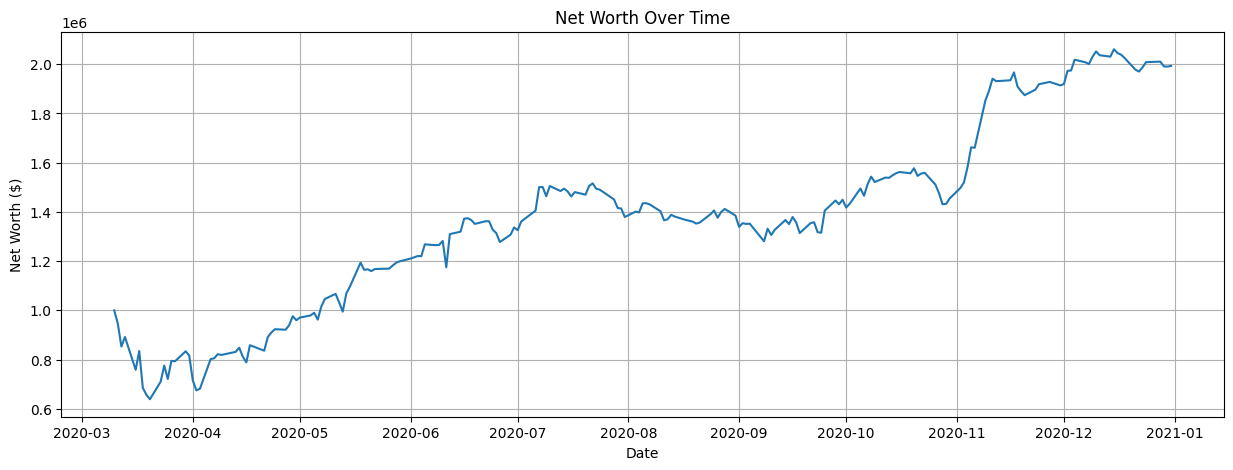

Net Worth Over Time:
date
2020-03-10    1000000.000000
2020-03-11     946171.384454
2020-03-12     844748.266966
2020-03-13     874668.397397
2020-03-16     736374.489493
                   ...      
2020-12-24     551609.597684
2020-12-28     546672.316252
2020-12-29     535980.451892
2020-12-30     535835.883752
2020-12-31     531224.270821
Length: 207, dtype: float64
            date        open        high         low       close     volume  \
0     2020-03-10   69.285004   71.610001   67.342499   69.398430  285290000   
1     2020-03-10  203.360001  207.100006  194.669998  180.209366    3928700   
2     2020-03-10  101.930000  103.370003   97.449997   96.770439    9793200   
3     2020-03-10  237.000000  237.830002  215.000000  231.009995   13059600   
4     2020-03-10  108.639999  109.059998   99.110001   96.434265    8293200   
...          ...         ...         ...         ...         ...        ...   
5998  2020-12-31  345.040009  351.089996  344.049988  332.465424    196900

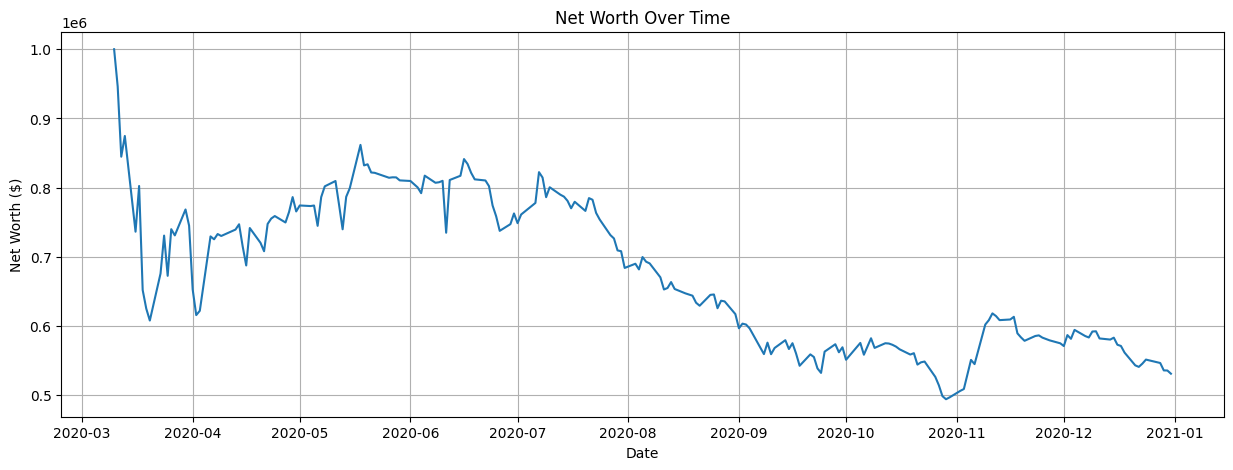

In [101]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_olmar = calculate_final_investment(olmar_X, olmar_B, initial_investment, 0, 0)

print("Net Worth Over Time:")
print(net_worth_olmar)

s = pd.Series(net_worth_olmar, name='OLMAR_olmar')

# Convert Series to DataFrame
olmar_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_olmar.index, net_worth_olmar)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()


# with fees
# Calculate final investment amount
# Calculate the net worth over time
# TODO even a small fee on OLMAR seems to kill it
net_worth_olmar_fee = calculate_final_investment(olmar_X_fee, olmar_B_fee, initial_investment, COMMISSION_FEE_PERCENT, COMMISSION_FEE_PERCENT)

print("Net Worth Over Time:")
print(net_worth_olmar_fee)

s = pd.Series(net_worth_olmar_fee, name='OLMAR_olmar')

# Convert Series to DataFrame
olmar_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_olmar_fee.index, net_worth_olmar_fee)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

# Other stuff
=======================================

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

tic             AAPL  AMGN  AXP            BA       CAT  CRM  CSCO  CVX  DIS  \
date                                                                           
2020-03-10  0.859134   0.0  0.0  7.259818e-16  0.140866  0.0   0.0  0.0  0.0   
2020-03-11  0.859134   0.0  0.0  7.259818e-16  0.140866  0.0   0.0  0.0  0.0   
2020-03-12  0.859134   0.0  0.0  7.259818e-16  0.140866  0.0   0.0  0.0  0.0   
2020-03-13  0.859134   0.0  0.0  7.259818e-16  0.140866  0.0   0.0  0.0  0.0   
2020-03-16  0.859134   0.0  0.0  7.259818e-16  0.140866  0.0   0.0  0.0  0.0   
...              ...   ...  ...           ...       ...  ...   ...  ...  ...   
2020-12-24  0.859134   0.0  0.0  7.259818e-16  0.140866  0.0   0.0  0.0  0.0   
2020-12-28  0.859134   0.0  0.0  7.259818e-16  0.140866  0.0   0.0  0.0  0.0   
2020-12-29  0.859134   0.0  0.0  7.259818e-16  0.140866  0.0   0.0  0.0  0.0   
2020-12-30  0.859134   0.0  0.0  7.259818e-16  0.140866  0.0   0.0  0.0  0.0   
2020-12-31  0.859134   0.0  0.0  7.25981

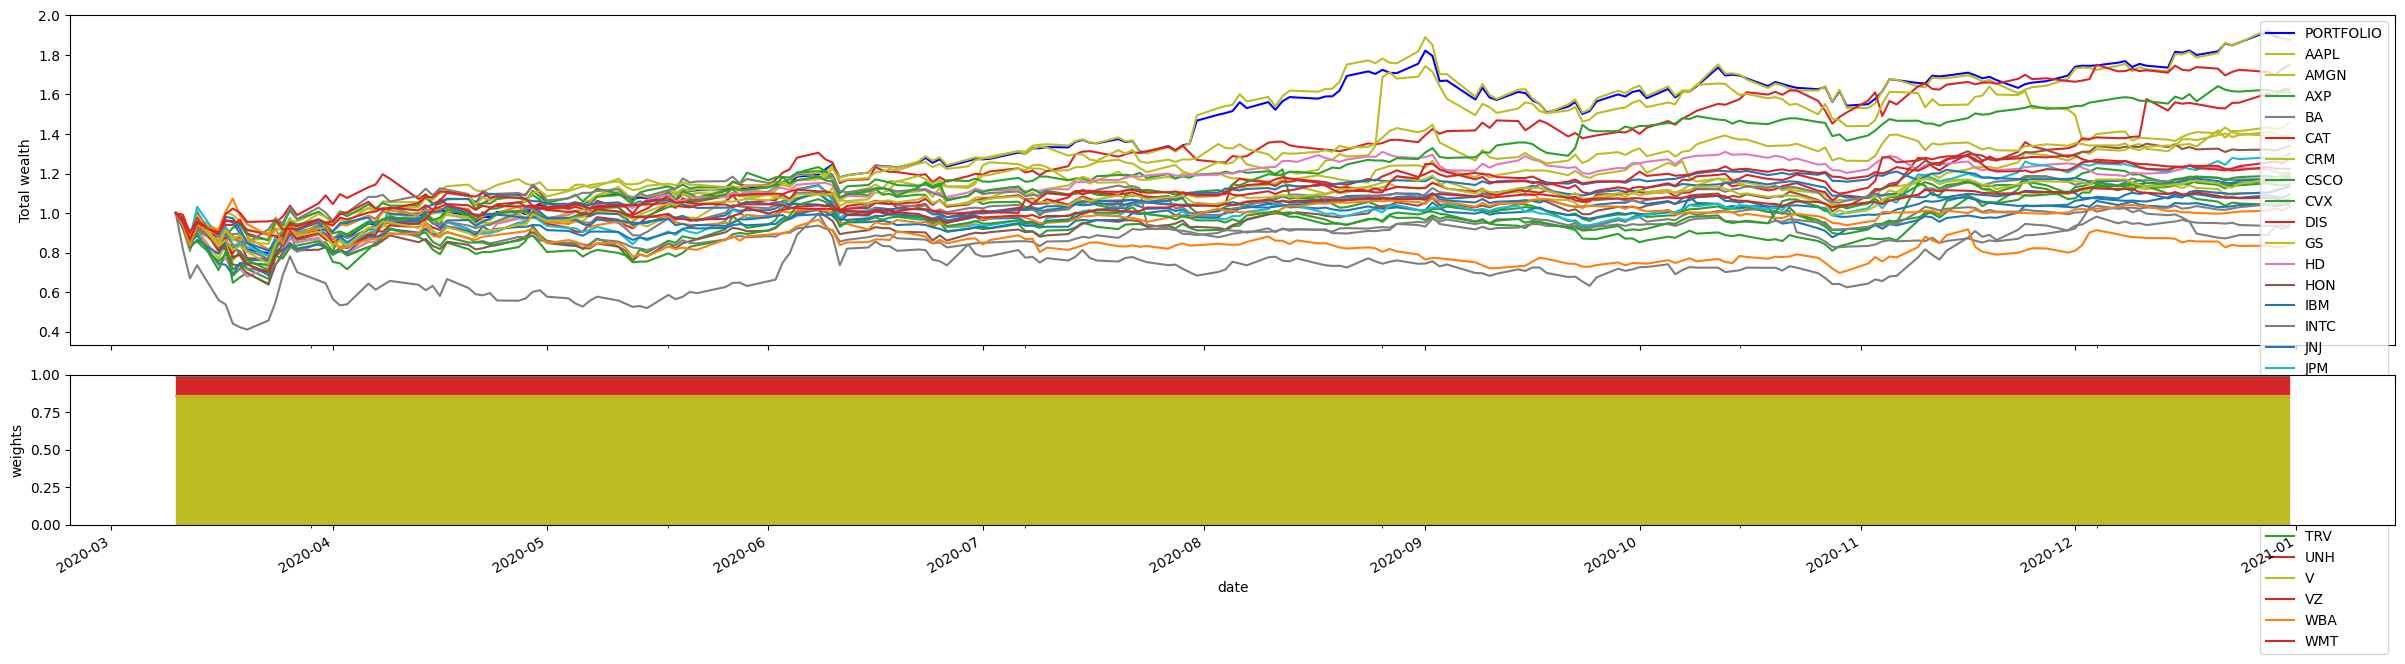

In [102]:
algo = BCRP(no_cash=True)
result = algo.run(pivot_df)

bcrp_B = result.B
print(result.B)
bcrp_X = result.X
print(result.X)
print(result.summary())
result.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.39
    Sharpe ratio: 2.01 ± 1.93
    Ulcer index: 12.06
    Information ratio (wrt benchmark): 1.90
    Benchmark sharpe: 0.98 ± 1.35
    Appraisal ratio (wrt benchmark): 1.99 ± 1.11
    Beta / Alpha: 0.93 / 53.751%
    Annualized return: 86.79%
    Annualized volatility: 43.16%
    Longest drawdown: 76 days
    Max drawdown: 20.29%
    Winning days: 56.3%
    Annual turnover: 1.4
        


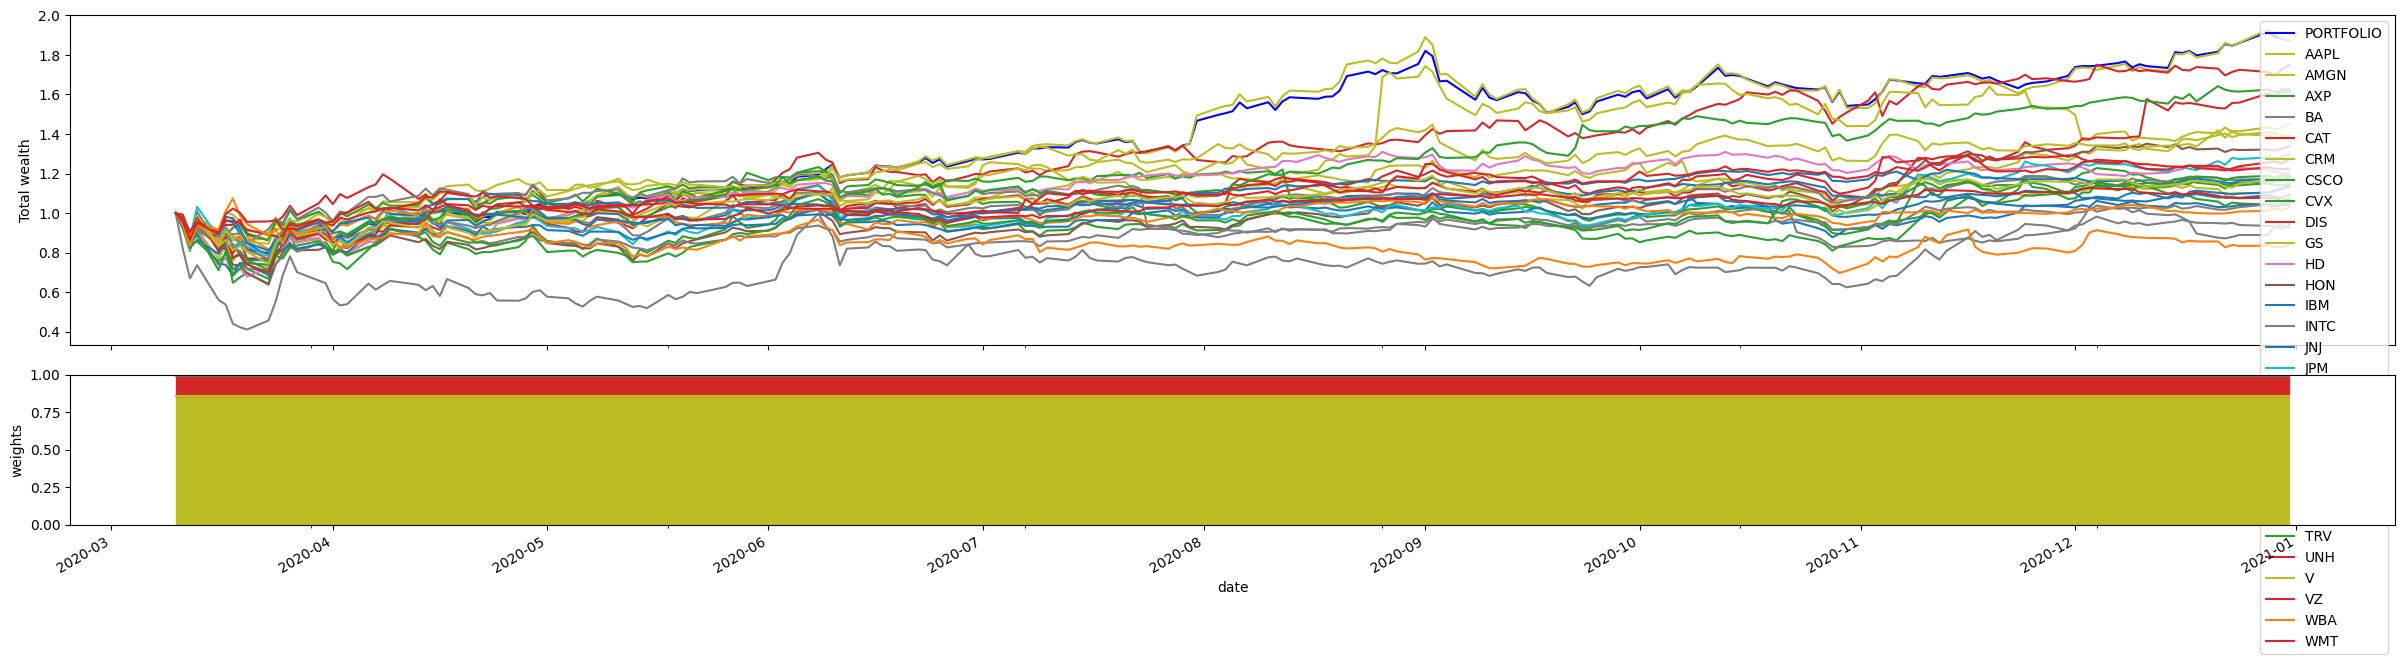

In [103]:
algo = BCRP(no_cash=True)
result_fee = algo.run(pivot_df)


# Here try setting a transaction fee
# Doesnt seem to do anything on BCRP becuase it doesn really change stocks
result_fee.fee = 0.001



bcrp_B_fee = result_fee.B
bcrp_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

Net Worth Over Time:
date
2020-03-10    1.000000e+06
2020-03-11    9.624649e+05
2020-03-12    8.694406e+05
2020-03-13    9.686540e+05
2020-03-16    8.527810e+05
                  ...     
2020-12-24    1.841670e+06
2020-12-28    1.896342e+06
2020-12-29    1.872072e+06
2020-12-30    1.863332e+06
2020-12-31    1.853848e+06
Length: 207, dtype: float64
            date        open        high         low       close     volume  \
0     2020-03-10   69.285004   71.610001   67.342499   69.398430  285290000   
1     2020-03-10  203.360001  207.100006  194.669998  180.209366    3928700   
2     2020-03-10  101.930000  103.370003   97.449997   96.770439    9793200   
3     2020-03-10  237.000000  237.830002  215.000000  231.009995   13059600   
4     2020-03-10  108.639999  109.059998   99.110001   96.434265    8293200   
...          ...         ...         ...         ...         ...        ...   
5998  2020-12-31  345.040009  351.089996  344.049988  332.465424    1969000   
5999  2020-12-31 

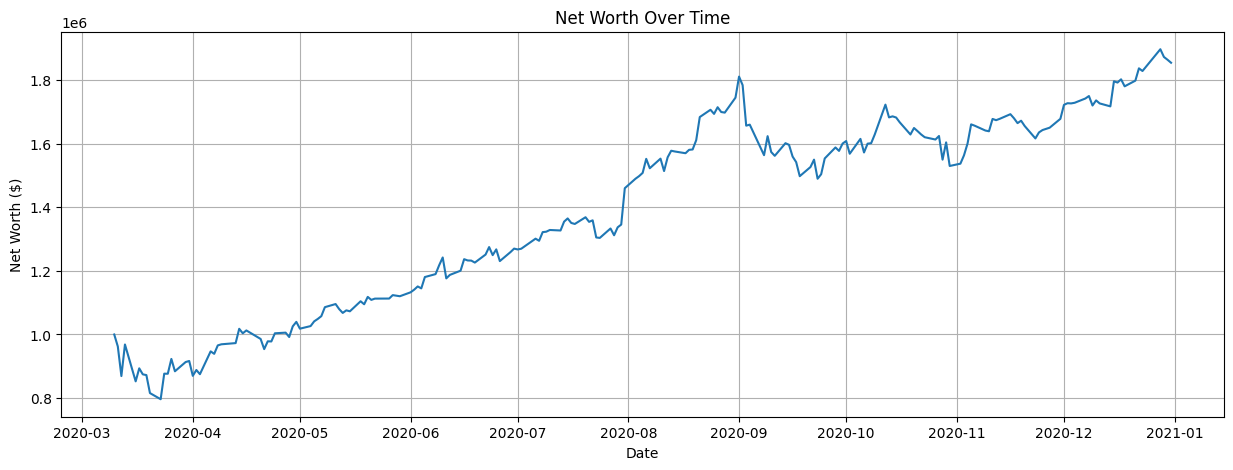

In [104]:


# # Example DataFrame for price relatives (X)
# X = pd.DataFrame({
#     'AAPL': [0.01, 0.02, -0.01],
#     'GOOG': [0.02, 0.01, 0.03],
#     'IBM': [-0.01, 0.03, 0.02],
#     'MSFT': [0.03, 0.00, 0.01]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(X)

# # Example DataFrame for portfolio weights (B)
# B = pd.DataFrame({
#     'AAPL': [0.25, 0.25, 0.00],
#     'GOOG': [0.25, 0.25, 1.00],
#     'IBM':  [0.25, 0.25, 0.00],
#     'MSFT': [0.25, 0.25, 0.00]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(B)

# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bcrp_fee = calculate_final_investment(bcrp_X_fee, bcrp_B_fee, initial_investment)

print("Net Worth Over Time:")
print(net_worth_bcrp_fee)

s = pd.Series(net_worth_bcrp_fee, name='BCRP')

# Convert Series to DataFrame
olmar_bcrp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_bcrp_fee.index, net_worth_bcrp_fee)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

Net Worth Over Time:
date
2020-03-10    1.000000e+06
2020-03-11    9.624649e+05
2020-03-12    8.694406e+05
2020-03-13    9.686540e+05
2020-03-16    8.527810e+05
                  ...     
2020-12-24    1.841670e+06
2020-12-28    1.896342e+06
2020-12-29    1.872072e+06
2020-12-30    1.863332e+06
2020-12-31    1.853848e+06
Length: 207, dtype: float64
            date        open        high         low       close     volume  \
0     2020-03-10   69.285004   71.610001   67.342499   69.398430  285290000   
1     2020-03-10  203.360001  207.100006  194.669998  180.209366    3928700   
2     2020-03-10  101.930000  103.370003   97.449997   96.770439    9793200   
3     2020-03-10  237.000000  237.830002  215.000000  231.009995   13059600   
4     2020-03-10  108.639999  109.059998   99.110001   96.434265    8293200   
...          ...         ...         ...         ...         ...        ...   
5998  2020-12-31  345.040009  351.089996  344.049988  332.465424    1969000   
5999  2020-12-31 

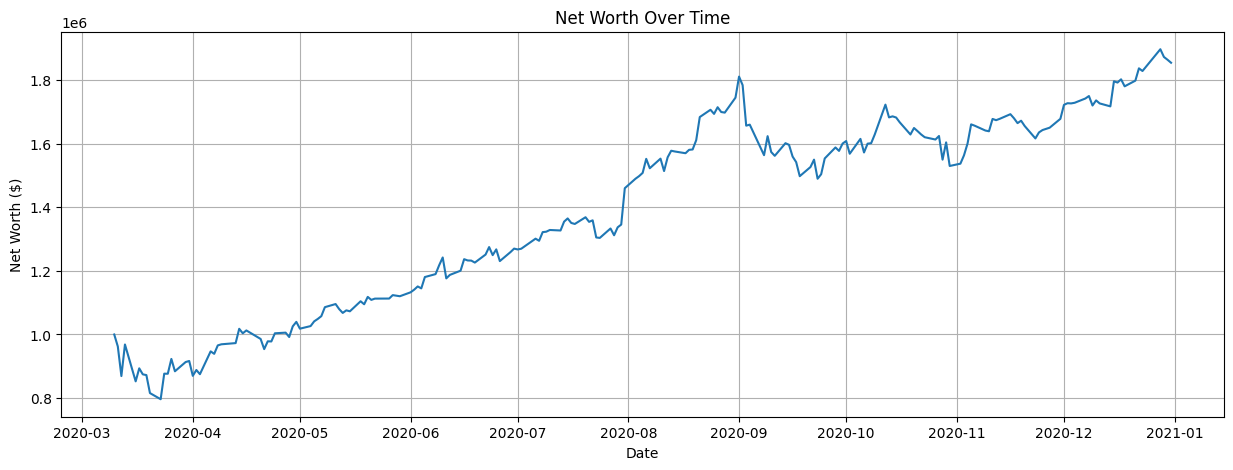

In [105]:
import pandas as pd
import numpy as np

# # Example DataFrame for price relatives (X)
# X = pd.DataFrame({
#     'AAPL': [0.01, 0.02, -0.01],
#     'GOOG': [0.02, 0.01, 0.03],
#     'IBM': [-0.01, 0.03, 0.02],
#     'MSFT': [0.03, 0.00, 0.01]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(X)

# # Example DataFrame for portfolio weights (B)
# B = pd.DataFrame({
#     'AAPL': [0.25, 0.25, 0.00],
#     'GOOG': [0.25, 0.25, 1.00],
#     'IBM':  [0.25, 0.25, 0.00],
#     'MSFT': [0.25, 0.25, 0.00]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(B)

# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bcrp = calculate_final_investment(bcrp_X, bcrp_B, initial_investment, COMMISSION_FEE_PERCENT, COMMISSION_FEE_PERCENT)

print("Net Worth Over Time:")
print(net_worth_bcrp)

s = pd.Series(net_worth_bcrp, name='BCRP')

# Convert Series to DataFrame
bcrp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_bcrp.index, net_worth_bcrp)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

Empty DataFrame
Columns: [ensemble, dji, BCRP]
Index: []


<Figure size 1500x500 with 0 Axes>

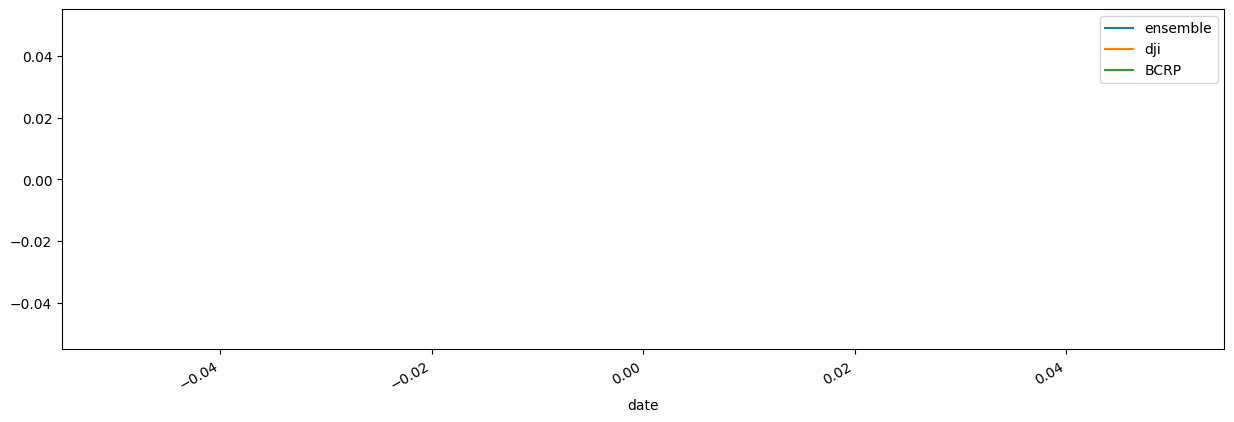

In [106]:
result = pd.DataFrame()
result = pd.read_csv("result.csv")

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

bcrp_df.index = pd.to_datetime(bcrp_df.index)

# Join DataFrames on date index
merged_df = result.join(bcrp_df, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.18
    Sharpe ratio: 0.98 ± 1.35
    Ulcer index: 6.70
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.98 ± 1.35
    Appraisal ratio (wrt benchmark): -0.00 ± 1.12
    Beta / Alpha: 1.00 / -0.000%
    Annualized return: 35.70%
    Annualized volatility: 36.25%
    Longest drawdown: 45 days
    Max drawdown: 22.69%
    Winning days: 56.8%
    Annual turnover: 3.3
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.17
    Sharpe ratio: 0.96 ± 1.34
    Ulcer index: 6.50
    Information ratio (wrt benchmark): -26.43
    Benchmark sharpe: 0.98 ± 1.35
    Appraisal ratio (wrt benchmark): -6.29 ± 1.12
    Beta / Alpha: 1.00 / -0.823%
    Annualized return: 34.88%
    Annualized volatility: 36.25%
    Longest drawdown: 45 days
    Max drawdown: 22.74%
    Winning days: 56.8%
    Annual turnover: 3.3
        


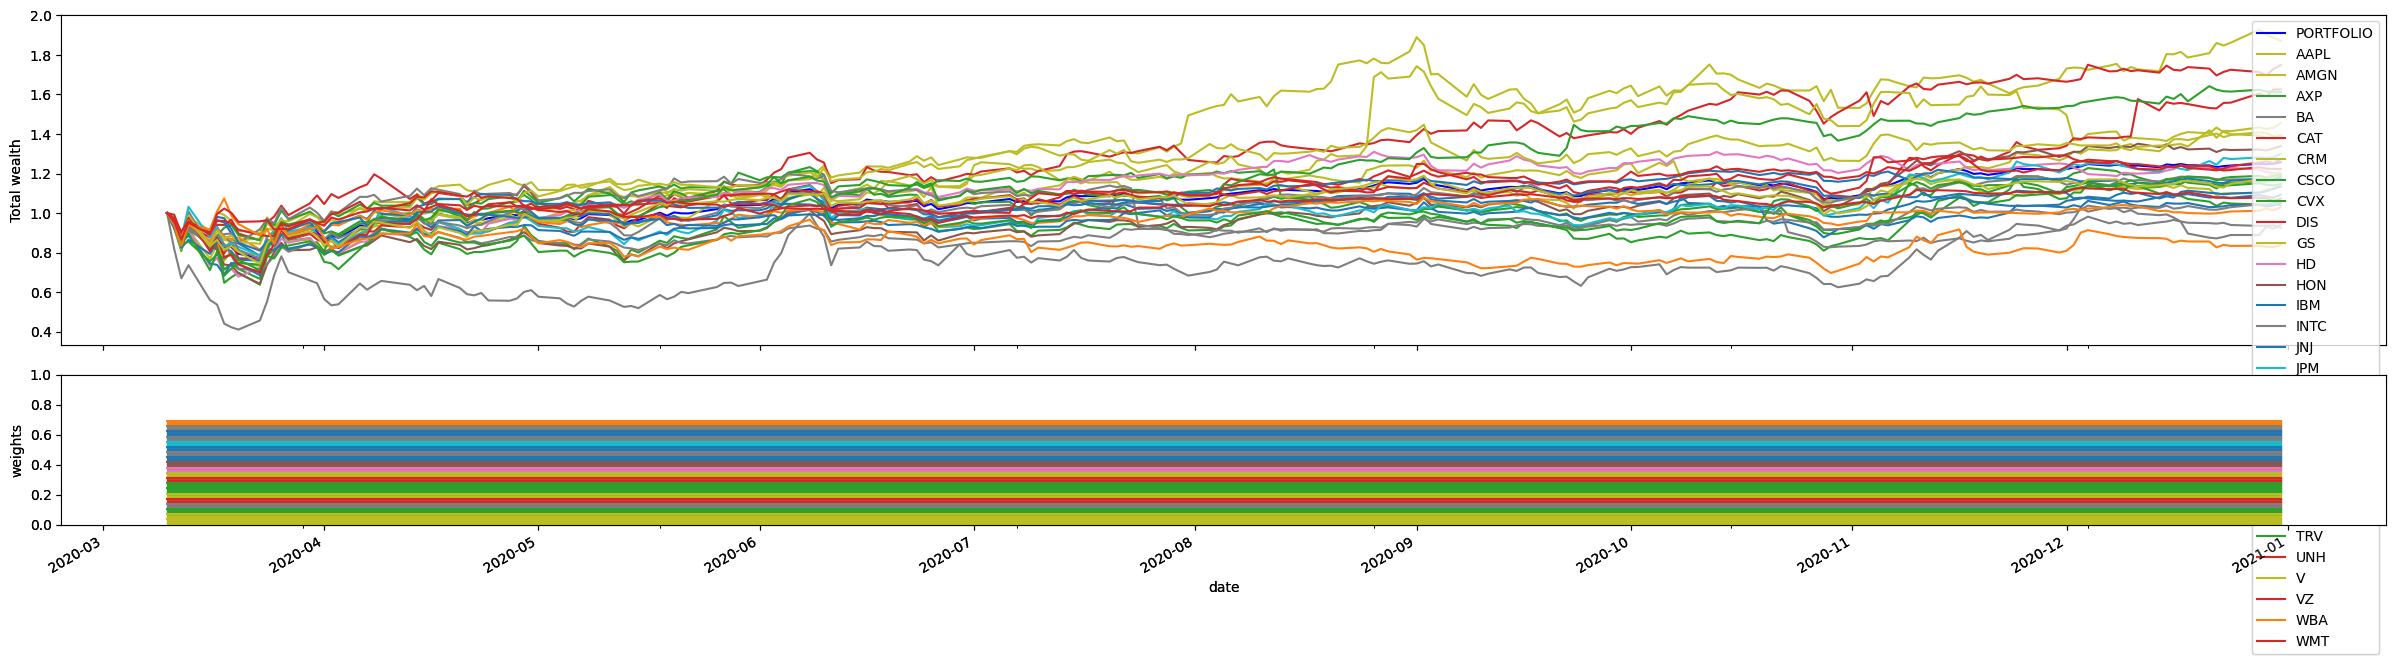

In [107]:
algo = CRP()
result = algo.run(pivot_df)

crp_B = result.B
crp_X = result.X
print(result.summary())
result.plot();



# Here try setting a transaction fee
result.fee = COMMISSION_FEE_PERCENT



crp_B_fee = result.B
crp_X_fee = result.X
print(result.summary())
result.plot();

Net Worth Over Time:
date
2020-03-10    1.000000e+06
2020-03-11    9.461714e+05
2020-03-12    8.518607e+05
2020-03-13    9.342939e+05
2020-03-16    8.236633e+05
                  ...     
2020-12-24    1.197592e+06
2020-12-28    1.205532e+06
2020-12-29    1.204009e+06
2020-12-30    1.205944e+06
2020-12-31    1.214189e+06
Length: 207, dtype: float64
            date        open        high         low       close     volume  \
0     2020-03-10   69.285004   71.610001   67.342499   69.398430  285290000   
1     2020-03-10  203.360001  207.100006  194.669998  180.209366    3928700   
2     2020-03-10  101.930000  103.370003   97.449997   96.770439    9793200   
3     2020-03-10  237.000000  237.830002  215.000000  231.009995   13059600   
4     2020-03-10  108.639999  109.059998   99.110001   96.434265    8293200   
...          ...         ...         ...         ...         ...        ...   
5998  2020-12-31  345.040009  351.089996  344.049988  332.465424    1969000   
5999  2020-12-31 

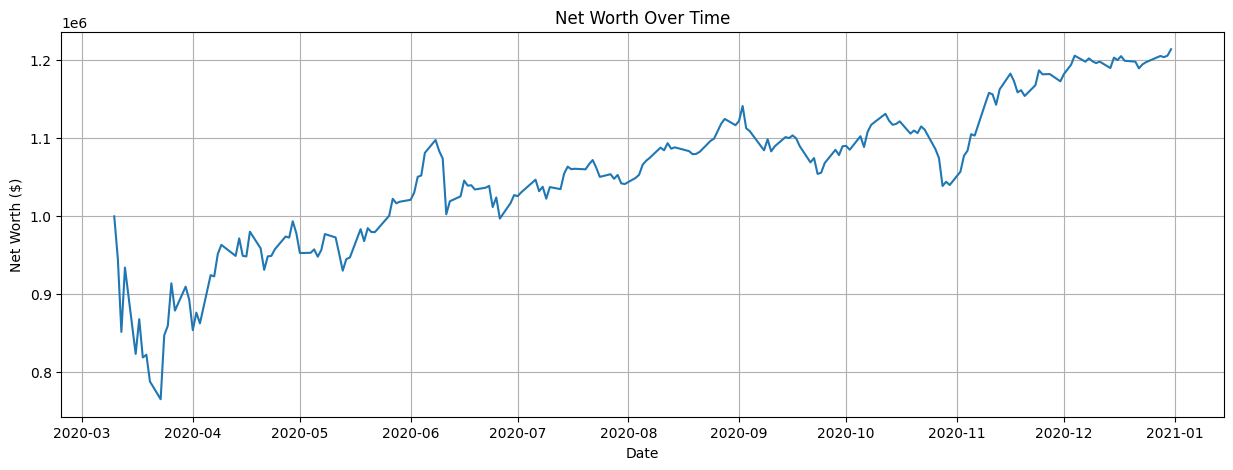

In [108]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_crp = calculate_final_investment(crp_X, crp_B, initial_investment)

print("Net Worth Over Time:")
print(net_worth_crp)

s = pd.Series(net_worth_crp, name='CRP')

# Convert Series to DataFrame
crp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_crp.index, net_worth_crp)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

# How do we handle transaction cost here for online

The widely adopted transaction costs model is the proportional transaction costs model in which the incurred transaction cost is proportional
to the wealth transferred during rebalancing.

In [109]:
# algo = TCO1(no_cash=True)
# result = algo.run(list_result)

# tco_B = result.B
# print(result.B)
# tco_X = result.X
# print(result.X)
# print(result.summary())
# result.plot();

In [110]:
# # Initial investment amount
# initial_investment = 1000000

# # Calculate final investment amount
# # Calculate the net worth over time
# net_worth_tco = calculate_final_investment(tco_X, tco_B, initial_investment, 0 ,0)

# print("Net Worth Over Time:")
# print(net_worth_tco)

# s = pd.Series(net_worth_tco, name='OLMAR_tco')

# # Convert Series to DataFrame
# olmar_tco_df = s.to_frame()

# print(df)

# # Plotting the net worth over time
# plt.plot(net_worth_tco.index, net_worth_tco)
# plt.xlabel('Date')
# plt.ylabel('Net Worth ($)')
# plt.title('Net Worth Over Time')
# plt.grid(True)
# plt.show()


# result = pd.DataFrame()
# result = pd.read_csv("result.csv")

# result.set_index('date', inplace=True)

# print(result)
# print(result.dtypes)
# result.index = pd.to_datetime(result.index)

# print(olmar_tco_df)
# print(result.dtypes)
# olmar_tco_df.index = pd.to_datetime(olmar_tco_df.index)

# # Join DataFrames on date index
# merged_df = result.join(olmar_tco_df, how='inner')
# print(merged_df)


# %matplotlib inline
# plt.rcParams["figure.figsize"] = (15,5)
# plt.figure();
# merged_df.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.18
    Sharpe ratio: 0.99 ± 1.35
    Ulcer index: 6.70
    Information ratio (wrt benchmark): -0.32
    Benchmark sharpe: 0.98 ± 1.35
    Appraisal ratio (wrt benchmark): 0.05 ± 1.12
    Beta / Alpha: 1.00 / 0.012%
    Annualized return: 35.66%
    Annualized volatility: 36.20%
    Longest drawdown: 45 days
    Max drawdown: 22.66%
    Winning days: 56.8%
    Annual turnover: 3.2
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\result.py:277: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i] > peak:
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\result.py:278: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

Summary:
    Profit factor: 1.17
    Sharpe ratio: 0.96 ± 1.34
    Ulcer index: 6.51
    Information ratio (wrt benchmark): -6.08
    Benchmark sharpe: 0.98 ± 1.35
    Appraisal ratio (wrt benchmark): -3.48 ± 1.12
    Beta / Alpha: 1.00 / -0.787%
    Annualized return: 34.86%
    Annualized volatility: 36.20%
    Longest drawdown: 45 days
    Max drawdown: 22.71%
    Winning days: 56.8%
    Annual turnover: 3.2
        


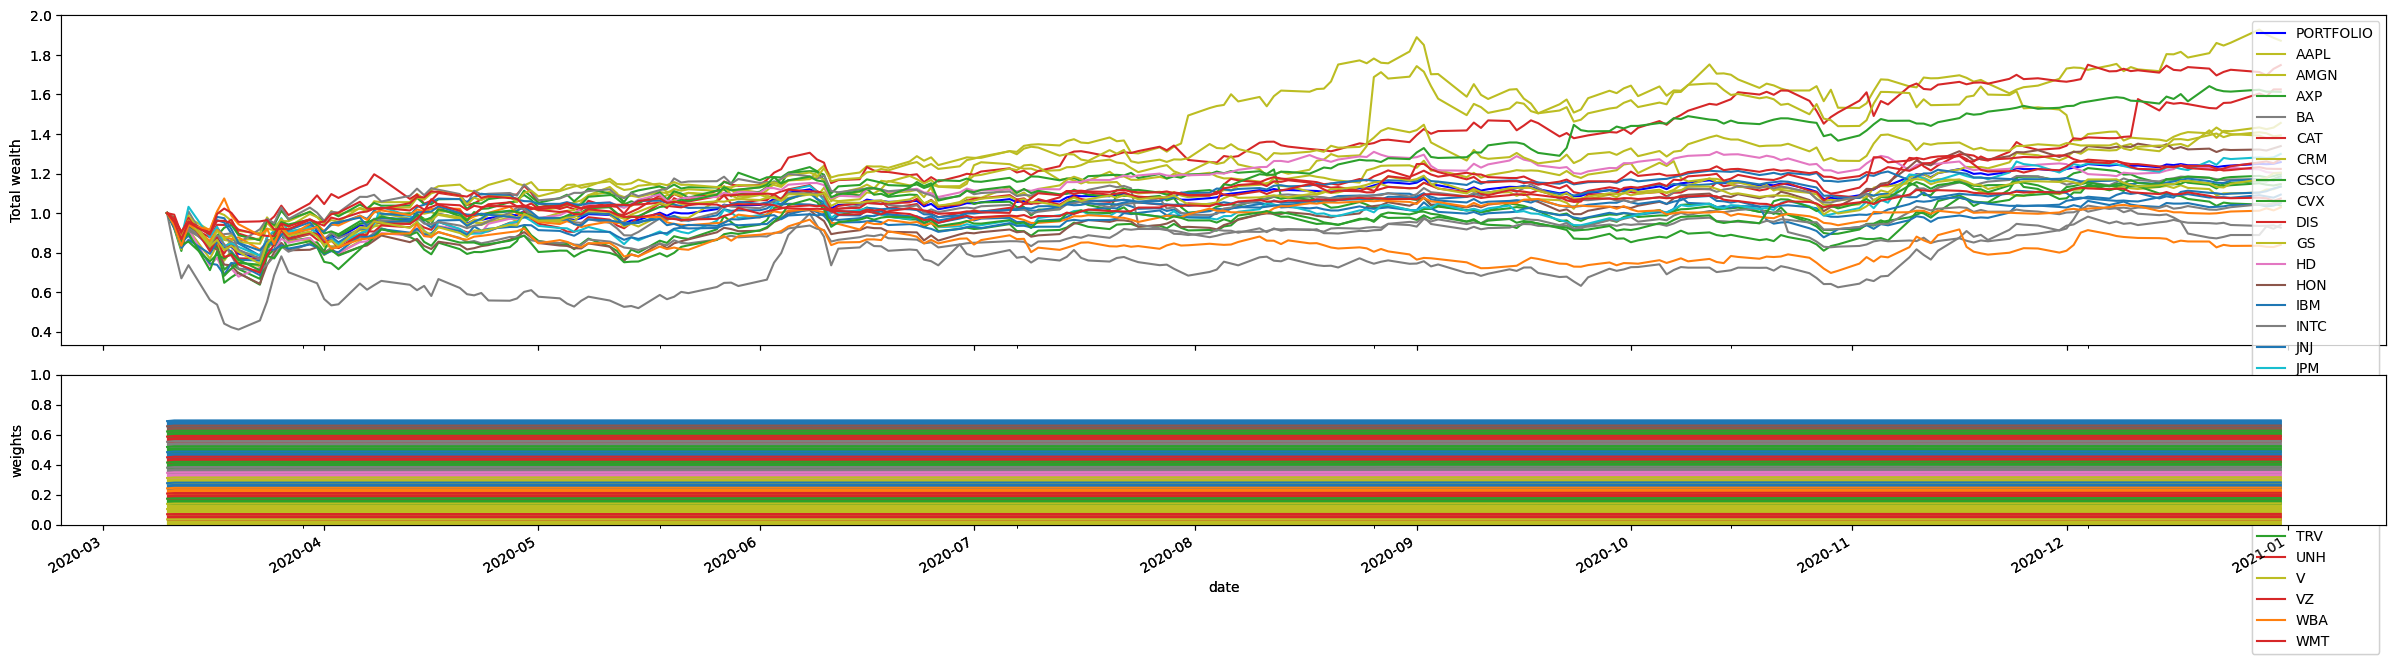

In [111]:
algo = UP()
result = algo.run(pivot_df)

up_B_fee = result.B
up_X_fee = result.X
print(result.summary())
result.plot();

result_fee = result


# Here try setting a transaction fee
result_fee.fee = COMMISSION_FEE_PERCENT



up_B_fee = result_fee.B
up_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

Net Worth Over Time:
date
2020-03-10    1.000000e+06
2020-03-11    9.462240e+05
2020-03-12    8.519617e+05
2020-03-13    9.343265e+05
2020-03-16    8.237890e+05
                  ...     
2020-12-24    1.196957e+06
2020-12-28    1.204922e+06
2020-12-29    1.203333e+06
2020-12-30    1.205271e+06
2020-12-31    1.213485e+06
Length: 207, dtype: float64


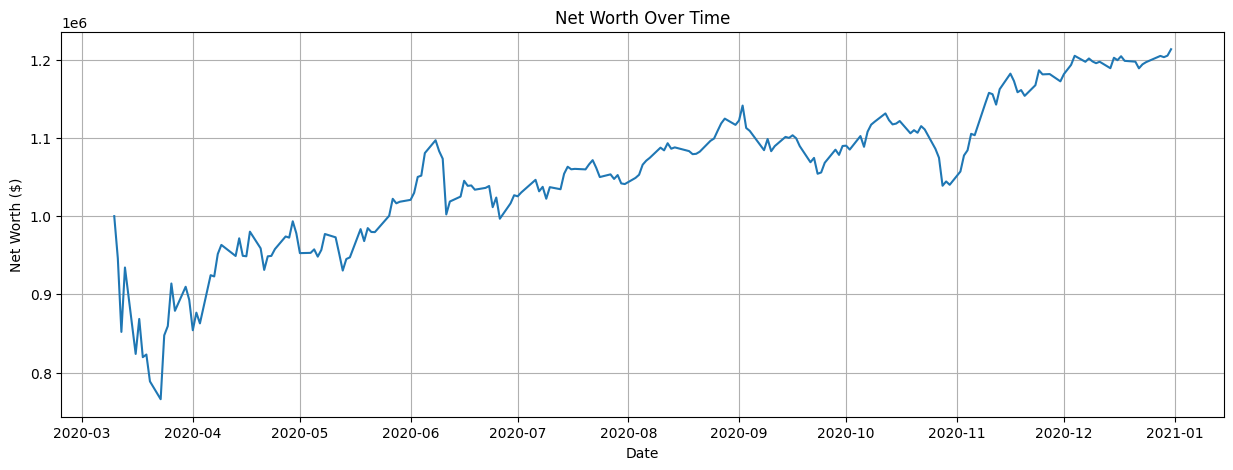

In [112]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_up = calculate_final_investment(up_X_fee, up_B_fee, initial_investment, COMMISSION_FEE_PERCENT, COMMISSION_FEE_PERCENT)

print("Net Worth Over Time:")
print(net_worth_up)

s = pd.Series(net_worth_up, name='up')

# Convert Series to DataFrame
up_df_fee = s.to_frame()

# Plotting the net worth over time
plt.plot(net_worth_up.index, net_worth_up)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

Empty DataFrame
Columns: [ensemble, dji, up]
Index: []


<Figure size 1500x500 with 0 Axes>

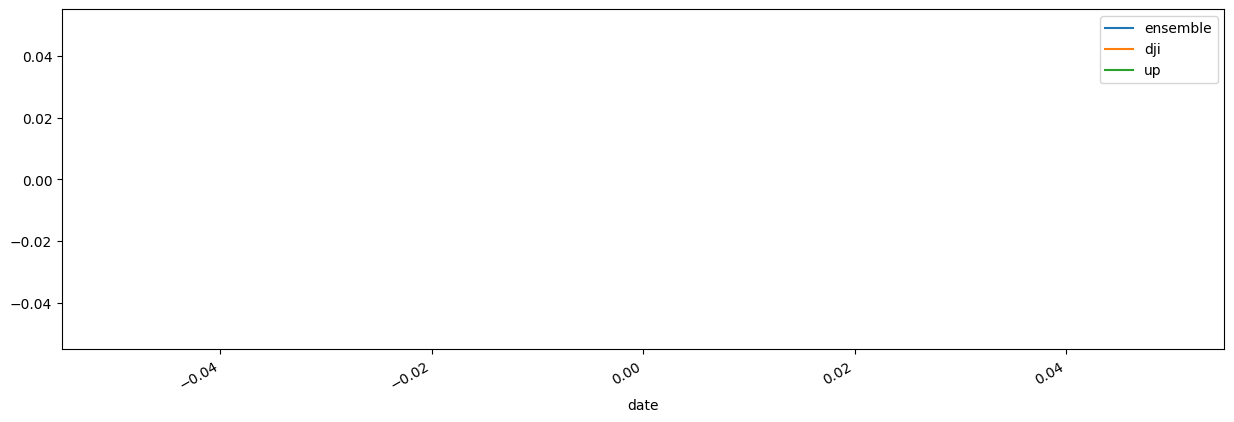

In [113]:
# TODO follow up on this??? How do I factor in the transaction cost here?

result = pd.DataFrame()

# TODO Change result period to use saved file
result = pd.read_csv(ensemble_result_file)

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

up_df_fee.index = pd.to_datetime(up_df_fee.index)

# Join DataFrames on date index
merged_df = result.join(up_df_fee, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (206, 8)
Annual return          0.269640
Cumulative returns     0.215499
Annual volatility      0.373532
Sharpe ratio           0.830203
Calmar ratio           1.049744
Stability              0.833892
Max drawdown          -0.256863
Omega ratio            1.187596
Sortino ratio          1.161400
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.004380
Daily value at risk   -0.045830
dtype: float64
df_dji:            date           dji
0   2020-03-10  1.000000e+06
1   2020-03-11  9.414450e+05
2   2020-03-12  8.474092e+05
3   2020-03-13  9.267516e+05
4   2020-03-16  8.069546e+05
..         ...           ...
202 2020-12-24  1.207118e+06
203 2020-12-28  1.215276e+06
204 2020-12-29  1.212546e+06
205 2020-12-30  1.215499e+06
206 2020-12-31           NaN

[207 rows x 2 columns]
df_dji:                       dji
date                    
2020-03-10  1.000000e+06
2020-03-11  9.414450e+05
2020-

<Figure size 1500x500 with 0 Axes>

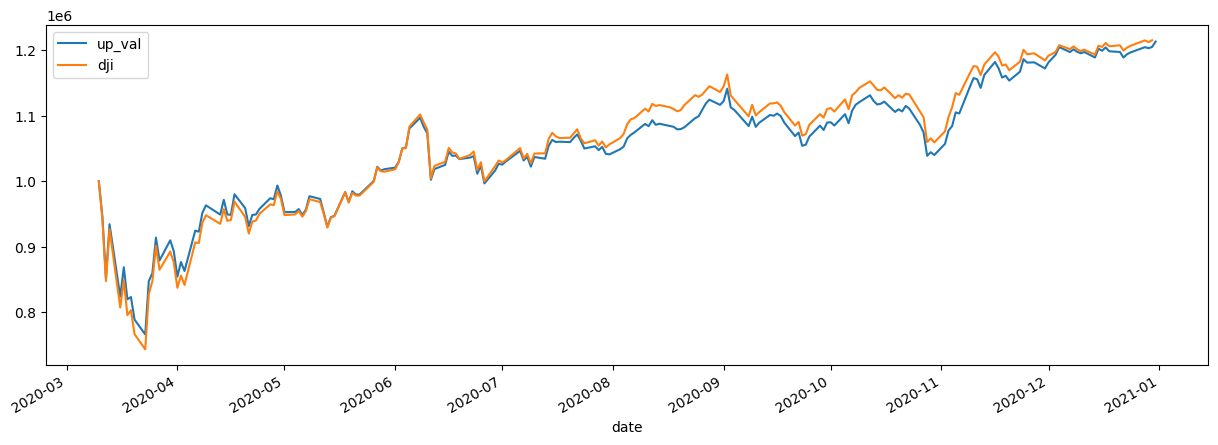

In [114]:
# Try comparing against baseline without ensemble


from finrl.plot import backtest_stats,  get_baseline

first_date = up_df_fee.index.min()
last_date = up_df_fee.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = up_df_fee.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_investment
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


df_result_up = pd.DataFrame({'date': up_df_fee.index, 'up_val': up_df_fee['up']})
df_result_up = df_result_up.set_index('date')

print("df_result_up.columns: ", df_result_up.columns)

print("df_result_up: ", df_result_up)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(df_result_up, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();


# BAH basline

=====================

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.16
    Sharpe ratio: 0.91 ± 1.32
    Ulcer index: 5.96
    Information ratio (wrt benchmark): -1.65
    Benchmark sharpe: 0.98 ± 1.35
    Appraisal ratio (wrt benchmark): -1.32 ± 1.12
    Beta / Alpha: 0.98 / -2.569%
    Annualized return: 32.42%
    Annualized volatility: 35.57%
    Longest drawdown: 45 days
    Max drawdown: 22.69%
    Winning days: 59.2%
    Annual turnover: 0.0
        
                AAPL      AMGN       AXP        BA       CAT       CRM  \
date                                                                     
2020-03-10  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2020-03-11  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2020-03-12  0.035161  0.034991  0.033634  0.029815  0.034442  0.034898   
2020-03-13  0.035165  0.035621  0.032686  0.027094  0.035020  0.035223   
2020-03-16  0.035891  0.036005  0.035523  0.027144  0.034472  0.033746   
...              ...       ...       ...       ...       .

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.16
    Sharpe ratio: 0.91 ± 1.32
    Ulcer index: 5.96
    Information ratio (wrt benchmark): -1.65
    Benchmark sharpe: 0.98 ± 1.35
    Appraisal ratio (wrt benchmark): -1.32 ± 1.12
    Beta / Alpha: 0.98 / -2.569%
    Annualized return: 32.42%
    Annualized volatility: 35.57%
    Longest drawdown: 45 days
    Max drawdown: 22.69%
    Winning days: 59.2%
    Annual turnover: 0.0
        


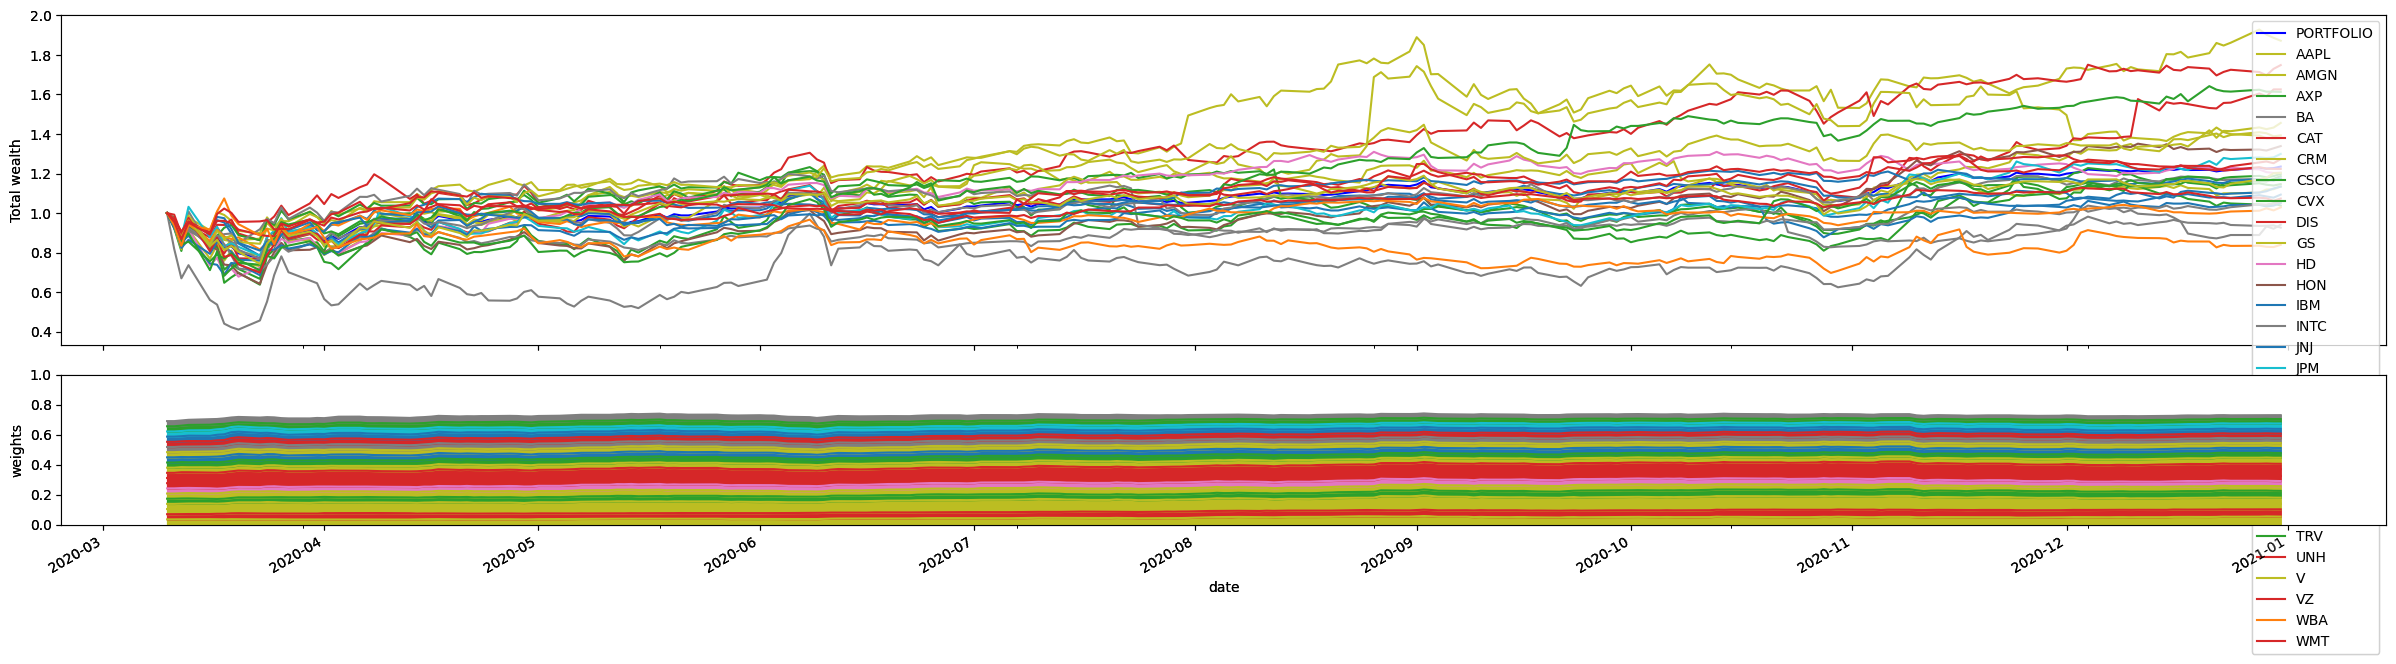

In [115]:
algo = BAH()
result = algo.run(pivot_df)

bah_B = result.B
bah_X = result.X
print(result.summary())
result.plot();

print(bah_B)

result_fee = result


# Here try setting a transaction fee
result_fee.fee = 0.001



bah_B_fee = result_fee.B
bah_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

In [116]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time

# TODO this is wrong because investment values are changing
net_worth_bah = calculate_final_investment_bah(bah_X_fee, bah_B_fee, initial_investment, COMMISSION_FEE_PERCENT)

print("Net Worth Over Time:")
print(net_worth_bah)

s = pd.Series(net_worth_bah, name='bah')

# Convert Series to DataFrame
bah_df_fee = s.to_frame()

# Plotting the net worth over time
plt.plot(net_worth_bah.index, net_worth_bah)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

                AAPL      AMGN       AXP        BA       CAT       CRM  \
date                                                                     
2020-03-10  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2020-03-11  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2020-03-12  0.035161  0.034991  0.033634  0.029815  0.034442  0.034898   
2020-03-13  0.035165  0.035621  0.032686  0.027094  0.035020  0.035223   
2020-03-16  0.035891  0.036005  0.035523  0.027144  0.034472  0.033746   
...              ...       ...       ...       ...       ...       ...   
2020-12-24  0.052394  0.031199  0.032570  0.026972  0.048610  0.039980   
2020-12-28  0.052669  0.031122  0.032602  0.026595  0.048801  0.039593   
2020-12-29  0.054147  0.030990  0.032638  0.026269  0.048118  0.039101   
2020-12-30  0.053549  0.031509  0.032652  0.026349  0.047763  0.038810   
2020-12-31  0.052985  0.031487  0.032942  0.026347  0.048582  0.038721   

                CSCO       CVX       

ValueError: No axis named 1 for object type Series

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (206, 8)
Annual return          0.269640
Cumulative returns     0.215499
Annual volatility      0.373532
Sharpe ratio           0.830203
Calmar ratio           1.049744
Stability              0.833892
Max drawdown          -0.256863
Omega ratio            1.187596
Sortino ratio          1.161400
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.004380
Daily value at risk   -0.045830
dtype: float64
df_dji:            date           dji
0   2020-03-10  1.000000e+06
1   2020-03-11  9.414450e+05
2   2020-03-12  8.474092e+05
3   2020-03-13  9.267516e+05
4   2020-03-16  8.069546e+05
..         ...           ...
202 2020-12-24  1.207118e+06
203 2020-12-28  1.215276e+06
204 2020-12-29  1.212546e+06
205 2020-12-30  1.215499e+06
206 2020-12-31           NaN

[207 rows x 2 columns]
df_dji:                       dji
date                    
2020-03-10  1.000000e+06
2020-03-11  9.414450e+05
2020-

<Figure size 1500x500 with 0 Axes>

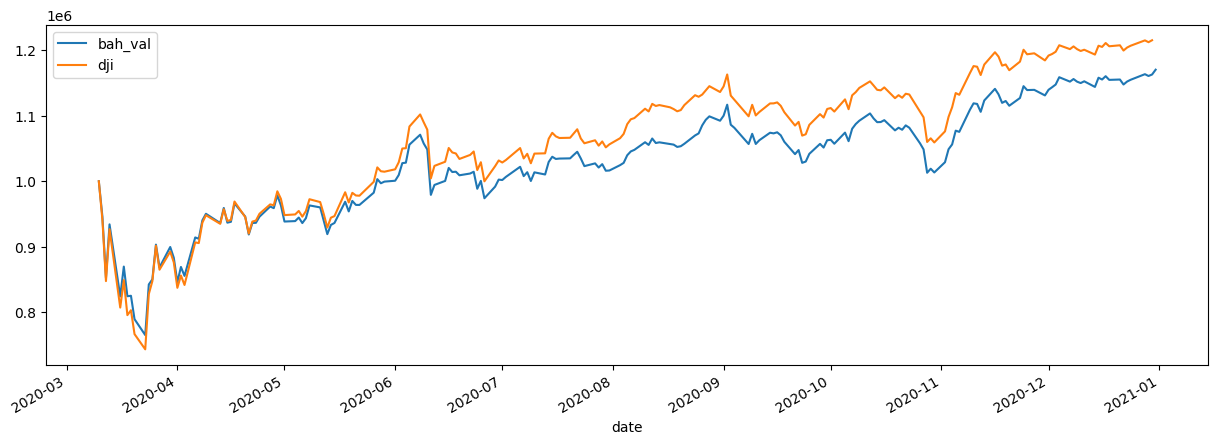

In [27]:
from finrl.plot import backtest_stats,  get_baseline

first_date = bah_df_fee.index.min()
last_date = bah_df_fee.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = bah_df_fee.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_investment
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


df_result_bah = pd.DataFrame({'date': bah_df_fee.index, 'bah_val': bah_df_fee['bah']})
df_result_bah = df_result_bah.set_index('date')

print("df_result_bah.columns: ", df_result_bah.columns)

print("df_result_bah: ", df_result_bah)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(df_result_bah, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();